**Ziyi Zhang 1005282720**

# Homework #4 Part I: Fit this model using HMC in `PyMC`

For the model specification example considered in "Metropolis within Gibbs" above...


## Provide posterior analysis for this model using "default" `PyMC` 

- Don't try to do "Metropolis within Gibbs" `in PyMC` -- you can't -- use the default HMC sampler
- You can do this without knowing what HMC is: you've already previously used HMC with `PyMC`; and, you can go get the distributions you need [here...](https://www.pymc.io/projects/docs/en/stable/api/distributions.html)
- ***Explore and describe the sample sizes needed to support inference regarding the `df` parameter $(\nu)$***

*Ahem...*

- Is it eating you up inside that you don't know what HMC actualy is? 
- Do you hate just using something without knowing what it is?<br>Or what you're even doing when you use it? 

*Well then, my friends, have I got the cure for you!*<br>All **you** must **do** is listen **to** someone **who** will re**view** for **you** the next slides **few**!



**Solution:**

To fit the model using Hamiltonian Monte Carlo (HMC) in PyMC, we need to redefine the model with the given specificiations. The model includes a location-scale Student's t-distribution for the location parameter ($\mu$), and a half normal distribution for the scale paramter ($\tau^2$), and a discrete normal distribution for the degrees of freedom parameter ($\nu$).

In [6]:
import pymc as pm
import arviz as az
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, tau_sq]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


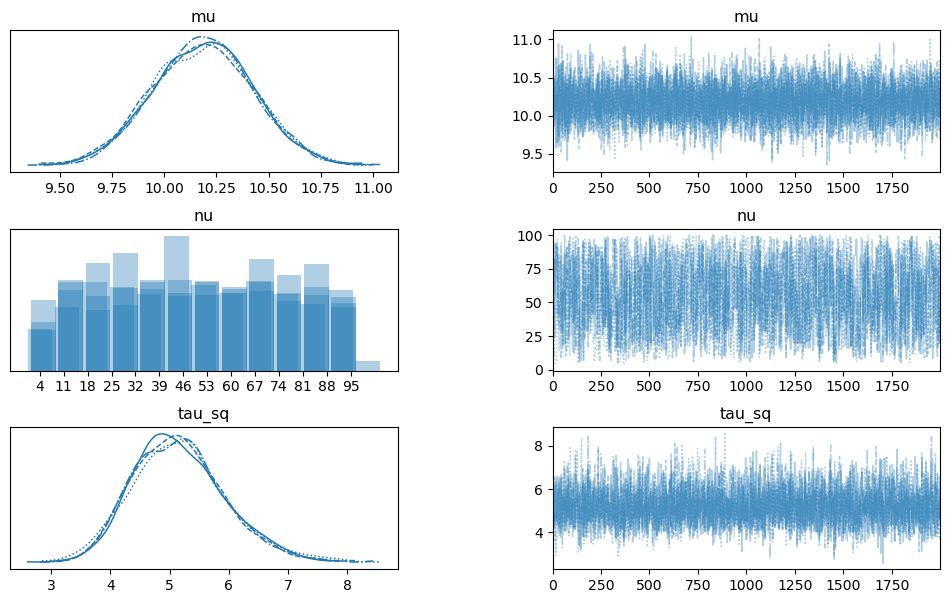

In [10]:
# True values for simulation purposes
n = 100
loc_true = 10
scale_true = 2
df_true = 15

# Simulate data from a location-scale Student's t-distribution
data = stats.t(df = df_true, loc = loc_true, scale = scale_true).rvs(n)

# Model setup in PyMC
with pm.Model() as model:
    
    # priors
    mu = pm.Normal('mu', mu = 0, sigma = 10)
    tau_sq = pm.HalfNormal('tau_sq', sigma = 5)
    nu = pm.DiscreteUniform('nu', lower = 1, upper = 100)
    
    # likelihood
    likelihood = pm.StudentT('x', nu =  nu, mu = mu, lam = 1/tau_sq, observed = data)
    
    # posterior inference using Hamiltonian Monte Carlo (HMC)
    trace = pm.sample(draws = 2000, tune = 1000, return_inferencedata = True)
    
# Posterior analysis
az.plot_trace(trace, figsize = (12, 7))
az.summary(trace, kind = 'stats')
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Homework #4 Part II: HMC Diagnostics 

- Return to your posterior analysis in "Homework #4 Part I" and 
report on (a) ***effective sample sizes***; (b) ***chain convergence measures***; (c) ***divergences***; (d) ***Metropolis-Hastings acceptance rates*** [see below for how to access these]; and (e) any other warnings or concers provided by `PyMC` 

- Now examine the [Eight Schools](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb) example PyMC model and outputted results
    - Provide an analogous report regarding (a)-(e) above for the "centered" and "uncentered" Eight Schools models
        - *Hint: for (d) see `fit_C.sample_stats.acceptance_rate.values.flatten()` and `fit_NC.sample_stats.acceptance_rate.values.flatten()` and in the Eight Schools example* 
    - From the perspective of ***curvature*** of the ***energy function*** (that is, how rapidly the ***log joint posterior distribution density*** changes for different values of its ***random variable (parameters)*** and the effectiveness of the ***HMC*** algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization
        - *Hint: see the previous two slides...*
- Review [this](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#model-checking) and [that](https://discourse.pymc.io/t/about-nuts-sampling-and-energy-plot/831) discussing the ***diagnostic plot*** which compares the ***observed energy proposal distribution*** versus the ***empirical energy distribution*** of the generated HMC samples
    - Use the code on the next slide to provide and interpret the ***diagnostic plot*** assessing ***energy proposals*** versus the empirical ***energy*** distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of ***energy function curvature*** and the effectiveness of the ***HMC*** algorithm... does this diagnostic support your previous conclusions in these regards?


**Solution:**

*Reporting on the posterior analysis in part I:*

a) Effective sample sizes: is a measure of the number of independent-like smaples in the posterior sample. It accounts for autocorrelation in the Markov chain

In [12]:
ess = az.ess(trace)
print(ess)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 7.677e+03
    nu       float64 1.225e+03
    tau_sq   float64 4.111e+03


b) Chain Convergence Measures: can be assessed using the R-hat statistic, which compares the variance within chains to the variance between cahins. Values close to 1.0 indicate good convergence

In [13]:
rhat = az.rhat(trace)
print(rhat)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 1.0
    nu       float64 1.004
    tau_sq   float64 1.001


c) Divergences: are a sign that the sampler has encountered regions of high curvature in the posterior distribution, which it finds difficult to explore. They are reported in the sampler stats in PyMC

In [14]:
divergences = trace.sample_stats['diverging'].sum()
print(divergences)

<xarray.DataArray 'diverging' ()>
array(0)


d) Metropolis-Hastings Acceptance Rates: relevant if the Metropolis-Hastings algorithm is used within HMC 

In [15]:
acceptance_rate = np.mean(trace.sample_stats['acceptance_rate'])
print(acceptance_rate)

<xarray.DataArray 'acceptance_rate' ()>
array(0.83408254)


e) Warnings or concerns provided by PyMC: none reported

*Eight Schools Example:*

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, tau, theta_tilde]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


{'ess': <xarray.Dataset>
Dimensions:            (theta_tilde_dim_0: 8, theta_dim_0: 8)
Coordinates:
  * theta_tilde_dim_0  (theta_tilde_dim_0) int64 0 1 2 3 4 5 6 7
  * theta_dim_0        (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu                 float64 3.702e+03
    theta_tilde        (theta_tilde_dim_0) float64 4.586e+03 ... 6.428e+03
    tau                float64 2.361e+03
    theta              (theta_dim_0) float64 4.402e+03 4.765e+03 ... 4.55e+03, 'rhat': <xarray.Dataset>
Dimensions:            (theta_tilde_dim_0: 8, theta_dim_0: 8)
Coordinates:
  * theta_tilde_dim_0  (theta_tilde_dim_0) int64 0 1 2 3 4 5 6 7
  * theta_dim_0        (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu                 float64 1.001
    theta_tilde        (theta_tilde_dim_0) float64 1.0 1.008 ... 1.0 0.9998
    tau                float64 0.9996
    theta              (theta_dim_0) float64 1.001 1.0 1.0 1.001 1.0 1.0 1.0 1.0, 'divergences': <xarray.DataArray 'diverging' ()>
ar

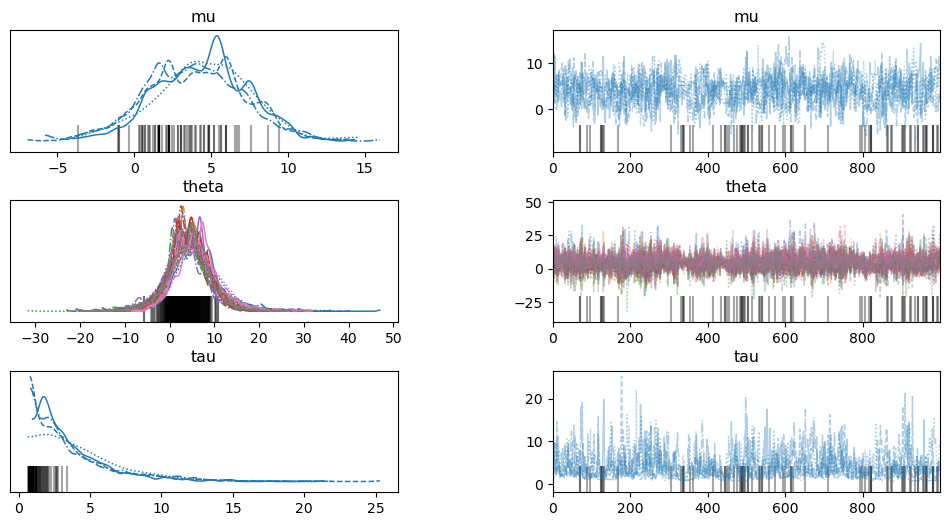

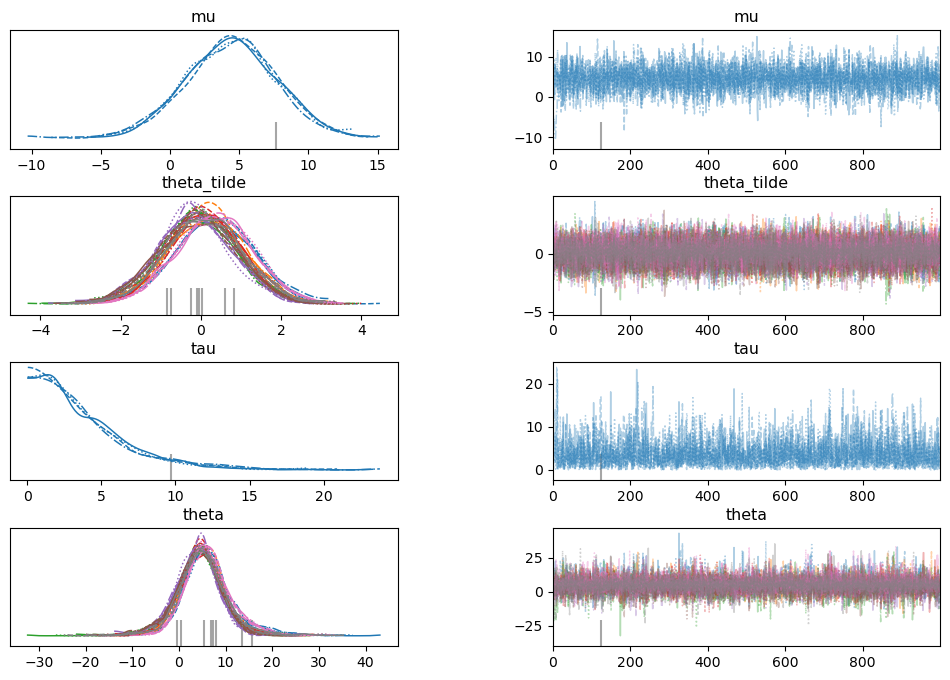

In [22]:
# Sample data for the Eight Schools Model
school_effects = np.array([28, 8, -3, 7, -1, 1, 18, 12])
school_se = np.array([15, 10, 16, 11, 9, 11, 10, 18])

# Centered model
with pm.Model() as centered_model:
    mu = pm.Normal('mu', mu=0, sigma=5)
    tau = pm.HalfCauchy('tau', beta=5)
    theta = pm.Normal('theta', mu=mu, sigma=tau, shape=len(school_effects))
    obs = pm.Normal('obs', mu=theta, sigma=school_se, observed=school_effects)
    trace_centered = pm.sample()

# Uncentered model
with pm.Model() as uncentered_model:
    mu = pm.Normal('mu', mu=0, sigma=5)
    tau = pm.HalfCauchy('tau', beta=5)
    theta_tilde = pm.Normal('theta_tilde', mu=0, sigma=1, shape=len(school_effects))
    theta = pm.Deterministic('theta', mu + tau * theta_tilde)
    obs = pm.Normal('obs', mu=theta, sigma=school_se, observed=school_effects)
    trace_uncentered = pm.sample()
    
# For centered model
az.plot_trace(trace_centered)
centered_diagnostics = {
    'ess': az.ess(trace_centered),
    'rhat': az.rhat(trace_centered),
    'divergences': trace_centered.sample_stats['diverging'].sum(),
    'acceptance_rate': np.mean(trace_centered.sample_stats['acceptance_rate'])
}
plt.subplots_adjust(hspace=0.4, wspace=0.4) 

# For uncentered model
az.plot_trace(trace_uncentered)
uncentered_diagnostics = {
    'ess': az.ess(trace_uncentered),
    'rhat': az.rhat(trace_uncentered),
    'divergences': trace_uncentered.sample_stats['diverging'].sum(),
    'acceptance_rate': np.mean(trace_uncentered.sample_stats['acceptance_rate'])
}
print(uncentered_diagnostics)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

*Diagnostic plot comparing the observed energy proposal distribution versus the empirical energy distribution:*

<Axes: >

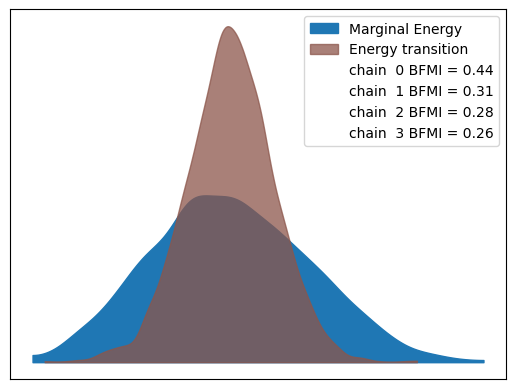

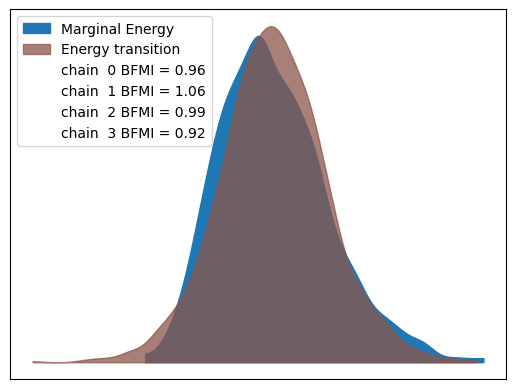

In [24]:
# Plot energy comparison
az.plot_energy(trace_centered)
az.plot_energy(trace_uncentered)